In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

In [2]:
data = pd.read_csv('forestfires.csv')
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [4]:
data['size_category'] = 0
data.loc[data['area']>=6, 'size_category'] = 1
data.tail(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
507,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,0
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,0
509,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,...,0,0,0,0,0,0,0,0,0,0
510,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,...,0,0,0,0,0,0,0,0,0,0
511,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,0


Text(0.5, 1.0, 'Countplot of days of week')

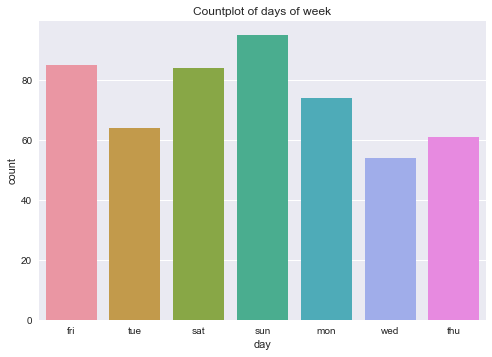

In [5]:
sns.countplot(data=data, x= 'day')
plt.title('Countplot of days of week')

Text(0.5, 1.0, 'Countplot of is weekend')

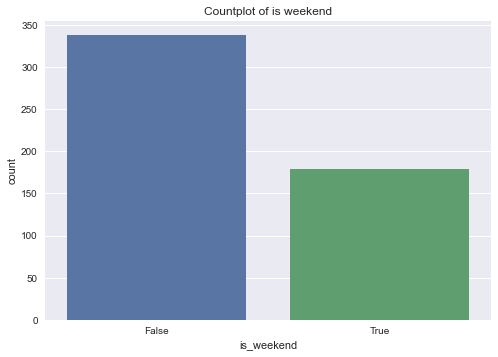

In [6]:
data['day'] = ((data['day']=='sun') | (data['day']=='sat'))
data.rename(columns={'day':'is_weekend'}, inplace=True)
sns.countplot(data=data, x='is_weekend')
plt.title('Countplot of is weekend')

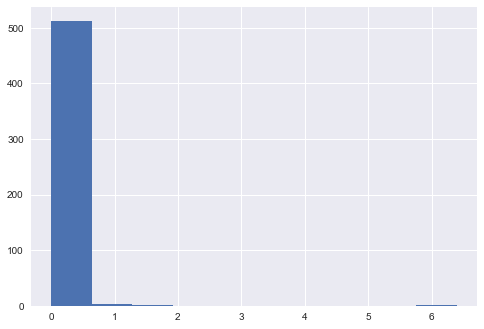

In [7]:
plt.hist(data['rain'])
plt.show()

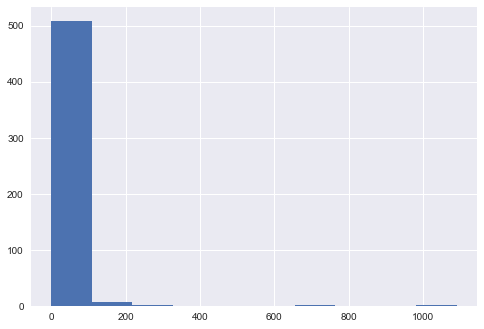

In [8]:
plt.hist(data['area'])
plt.show()

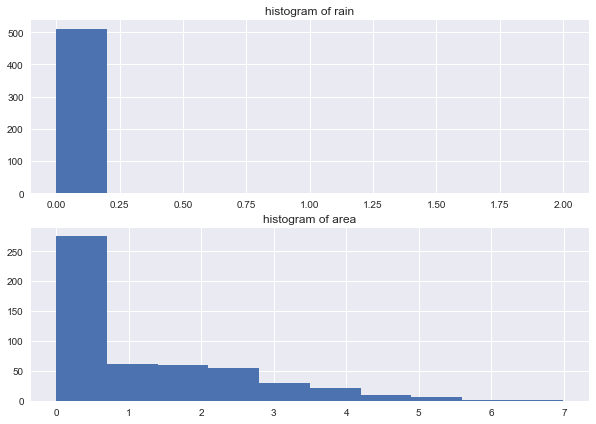

In [9]:
data.loc[:, ['rain', 'area']] = data.loc[:, ['rain', 'area']].apply(lambda x: np.log(x+1), axis=1)

fig, ax = plt.subplots(2, figsize=(10,7))
ax[0].hist(data['rain'])
ax[0].title.set_text('histogram of rain')
ax[1].hist(data['area'])
ax[1].title.set_text('histogram of area')

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

data.drop(columns=['is_weekend', 'month'], inplace=True)
X = data.drop(['size_category'], axis = 1)
y = data['size_category'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# fitting scaler
sc_features = StandardScaler()
# transforming features
X_test = sc_features.fit_transform(X_test)
X_train = sc_features.transform(X_train)



'''
features = data.select_dtypes(['int64', 'float64']).columns

# fitting scaler
scale = StandardScaler()

# transforming features
data[features] = scale.fit_transform(data[features])
data[features] = pd.DataFrame(data, columns = data[features].columns)
'''

"\nfeatures = data.select_dtypes(['int64', 'float64']).columns\n\n# fitting scaler\nscale = StandardScaler()\n\n# transforming features\ndata[features] = scale.fit_transform(data[features])\ndata[features] = pd.DataFrame(data, columns = data[features].columns)\n"

In [11]:
from sklearn.model_selection import train_test_split

# features
X_test = pd.DataFrame(X_test, columns = X.columns)
X_train = pd.DataFrame(X_train, columns = X.columns)
# labels
y_test = pd.DataFrame(y_test, columns = ['size_category'])
y_train = pd.DataFrame(y_train, columns = ['size_category'])
'''
data.drop(columns=['is_weekend', 'month'], inplace=True)
X = data.drop(['size_category'], axis = 1)
y = data['size_category'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
'''

"\ndata.drop(columns=['is_weekend', 'month'], inplace=True)\nX = data.drop(['size_category'], axis = 1)\ny = data['size_category'].values.reshape(-1, 1)\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)\n"

In [12]:
X_train.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.342959,-0.060220,0.867158,-0.249015,0.784070,-1.071784,-0.054362,-0.137348,0.219260,-0.48795,...,-0.172345,-0.140028,-0.098533,-0.172345,-0.2,-0.361158,-0.098533,0.0,-0.140028,1.570563
1,-0.057456,0.370353,0.600021,-0.465731,-0.203920,-0.279375,-1.042369,-0.137348,0.177491,-0.48795,...,-0.172345,-0.140028,-0.098533,-0.172345,-0.2,-0.361158,-0.098533,0.0,-0.140028,1.570563
2,0.312158,0.834731,0.483714,0.664288,0.221938,0.248898,-0.054362,-0.137348,0.180797,-0.48795,...,-0.172345,-0.140028,-0.098533,-0.172345,-0.2,-0.361158,-0.098533,0.0,-0.140028,-0.636715
3,1.544206,1.341810,0.537142,0.664288,2.283090,-1.071784,-1.042369,-0.137348,1.087255,-0.48795,...,-0.172345,-0.140028,-0.098533,-0.172345,-0.2,-0.361158,-0.098533,0.0,-0.140028,-0.636715
4,-1.320305,-1.602809,-2.022846,-0.945602,-1.106740,0.645102,-1.042369,-0.137348,0.578923,-0.48795,...,-0.172345,7.141428,-0.098533,-0.172345,-0.2,-0.361158,-0.098533,0.0,-0.140028,-0.636715


In [13]:
from sklearn.metrics import r2_score
import tensorflow as tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model

In [14]:
def init_model():

    model = Sequential()
    model.add(Dense(6, input_dim=28, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(6, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'relu'))
    model.compile(optimizer ='adam',
    metrics=['accuracy'],
    loss = 'binary_crossentropy')
    return model

In [15]:
X_train=tensorflow.convert_to_tensor(X_train, dtype=tensorflow.float32)
y_train=tensorflow.convert_to_tensor(y_train, dtype=tensorflow.float32)
X_test=tensorflow.convert_to_tensor(X_test, dtype=tensorflow.float32)
y_test=tensorflow.convert_to_tensor(y_test, dtype=tensorflow.float32)

In [16]:
# init model
model = init_model()
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)
# model checkpoint
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fitting model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=250, verbose=0, batch_size=6, callbacks=[es, mc])


Epoch 1: val_accuracy improved from -inf to 0.73077, saving model to best_model.h5

Epoch 2: val_accuracy did not improve from 0.73077

Epoch 3: val_accuracy did not improve from 0.73077

Epoch 4: val_accuracy did not improve from 0.73077

Epoch 5: val_accuracy did not improve from 0.73077

Epoch 6: val_accuracy did not improve from 0.73077

Epoch 7: val_accuracy did not improve from 0.73077

Epoch 8: val_accuracy did not improve from 0.73077

Epoch 9: val_accuracy did not improve from 0.73077

Epoch 10: val_accuracy did not improve from 0.73077

Epoch 11: val_accuracy did not improve from 0.73077

Epoch 12: val_accuracy did not improve from 0.73077

Epoch 13: val_accuracy did not improve from 0.73077

Epoch 14: val_accuracy improved from 0.73077 to 0.74038, saving model to best_model.h5

Epoch 15: val_accuracy improved from 0.74038 to 0.77885, saving model to best_model.h5

Epoch 16: val_accuracy did not improve from 0.77885

Epoch 17: val_accuracy did not improve from 0.77885

Epoch


Epoch 148: val_accuracy did not improve from 0.96154

Epoch 149: val_accuracy did not improve from 0.96154

Epoch 150: val_accuracy did not improve from 0.96154

Epoch 151: val_accuracy did not improve from 0.96154

Epoch 152: val_accuracy did not improve from 0.96154

Epoch 153: val_accuracy did not improve from 0.96154

Epoch 154: val_accuracy did not improve from 0.96154

Epoch 155: val_accuracy did not improve from 0.96154

Epoch 156: val_accuracy did not improve from 0.96154

Epoch 157: val_accuracy did not improve from 0.96154

Epoch 158: val_accuracy did not improve from 0.96154

Epoch 159: val_accuracy did not improve from 0.96154

Epoch 160: val_accuracy did not improve from 0.96154

Epoch 161: val_accuracy did not improve from 0.96154

Epoch 162: val_accuracy did not improve from 0.96154

Epoch 163: val_accuracy did not improve from 0.96154

Epoch 164: val_accuracy did not improve from 0.96154

Epoch 165: val_accuracy did not improve from 0.96154

Epoch 166: val_accuracy did

In [20]:
history.history

{'loss': [3.635451316833496,
  3.069037675857544,
  2.719209909439087,
  2.425297498703003,
  1.828412413597107,
  1.6382328271865845,
  1.448099970817566,
  1.77383291721344,
  1.6506754159927368,
  1.0983154773712158,
  1.252254843711853,
  1.5386518239974976,
  1.3962115049362183,
  1.463694453239441,
  1.1045886278152466,
  1.4703665971755981,
  1.3483961820602417,
  1.2991149425506592,
  1.3101778030395508,
  0.9485430717468262,
  0.9708544015884399,
  0.8628816604614258,
  0.7894489765167236,
  0.9454975724220276,
  0.7963981032371521,
  0.8723999261856079,
  0.8426163196563721,
  0.6766957640647888,
  0.5747126936912537,
  0.5117563009262085,
  0.6792117357254028,
  0.6674999594688416,
  0.7210727334022522,
  0.6244445443153381,
  0.5276304483413696,
  0.5783863663673401,
  0.5041714906692505,
  0.6536751389503479,
  0.675889253616333,
  0.5006797909736633,
  0.5770799517631531,
  0.6331664323806763,
  0.46035677194595337,
  0.579807698726654,
  0.5128368735313416,
  0.469632685

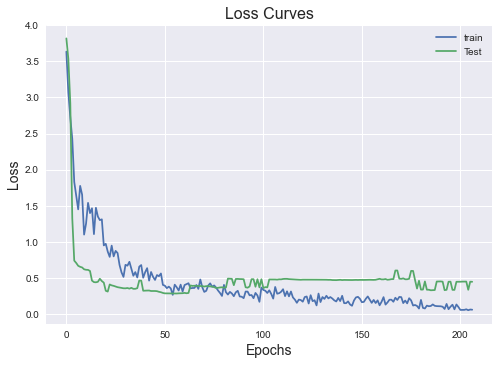

In [17]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss Curves', fontsize=16)
plt.show()

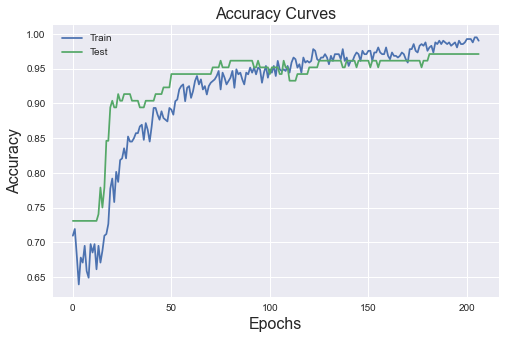

In [18]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

In [19]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))


Train: 0.998, Valid: 0.971


## The accuracy score of the train data is 97% and the accuracy score of the valid or the test data is 99%.